<a href="https://colab.research.google.com/github/BrianTruong23/credit_card_fraud_detection/blob/main/CreditFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Fraud Detection

Higher Workflow Overview:
- 1) Importing dataset using PySpark
- 2) Understand data using SQL commands
- 3) Data Pre-processing
- 4) Data Visualization
- 5) Data Modeling
- 6) Data Evaluation


## Data Importing Using PySpark

In this project, we use a considerably large dataset (150.8MB), therefore, we use PySpark to optimize loading and processing of the dataset.

### Some benefits of using PySpark
- Distributed Processing: the PySpark library leverages the power of Apache Spark for distributed processing to process data parallely across different unit.
- Scalibility: PySpark can seamlessly handle small dataset on a single machine to massive dataset across multiple processing units.
- Performance Optimization: PySpark performs a lot of data planning and execution to opimize the data processing. It pushes down a lot of data movements, effectively processing data at a much faster rate for big files.



In [26]:
# Import PySpark. If it does have PySpark installed, install it and create session for credit fraud detection
# Create a SparkSession:
try:
  import pyspark
  from pyspark.sql import SparkSession
  spark = SparkSession.builder.appName("credit_card_fraud_detection").getOrCreate()
except:
  !pip install pyspark
  import pyspark
  from pyspark.sql import SparkSession
  spark = SparkSession.builder.appName("credit_card_fraud_detection").getOrCreate()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=30c83984174d8fa338ce57bc30cba70b54b75a0947526b60bf9a0c85f5c2c2fc
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [27]:
# Load CSV as PySpark DataFrame:
df = spark.read.csv('creditcard.csv', header=True, inferSchema=True)

In [28]:
# Register DataFrame as SQL Table:
df.createOrReplaceTempView("credit_card_fraud_table")

In [29]:
# Perform SQL Queries:

result = spark.sql("SELECT * FROM credit_card_fraud_table WHERE amount > 100")
result.show()

+----+------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+--------------------+--------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+--------------------+-------------------+-------+-----+
|Time|                V1|                 V2|                 V3|                V4|                 V5|                V6|                V7|                V8|                 V9|                V10|                V11|                V12|               V13|               V14|               V15|                V16|               V17|               V18|                 V19|                 V20|                V21|           

In [34]:
import time
from pyspark.sql import SparkSession
import pandas as pd

# Create a Spark session
spark = SparkSession.builder.appName("DataFrameComparison").getOrCreate()

# Read the CSV file into a PySpark DataFrame
df_spark = spark.read.csv('creditcard.csv', header=True, inferSchema=True)

# Read the same CSV file into a Pandas DataFrame
df_pandas = pd.read_csv("creditcard.csv")

# Measure time for PySpark DataFrame
start_time_spark = time.time()

# Calculate the mean of class 0 in PySpark DataFrame
mean_class_0_spark = df_spark.filter(df_spark['Class'] == 0).agg({'Amount': 'mean'}).collect()[0][0]

end_time_spark = time.time()
time_spark = end_time_spark - start_time_spark

# Measure time for Pandas DataFrame
start_time_pandas = time.time()

# Calculate the mean of class 0 in Pandas DataFrame
mean_class_0_pandas = df_pandas[df_pandas['Class'] == 0]['Amount'].mean()

end_time_pandas = time.time()
time_pandas = end_time_pandas - start_time_pandas

# Print the results
print(f"Mean of class 0 in PySpark DataFrame: {mean_class_0_spark}")
print(f"Time taken for PySpark DataFrame: {time_spark} seconds")

print(f"\nMean of class 0 in Pandas DataFrame: {mean_class_0_pandas}")
print(f"Time taken for Pandas DataFrame: {time_pandas} seconds")

percentage_change = (mean_class_0_spark - mean_class_0_pandas) / mean_class_0_pandas

print(f"Percentage change: {percentage_increase}%")

# Stop the Spark session
spark.stop()


Mean of class 0 in PySpark DataFrame: 88.29102242233286
Time taken for PySpark DataFrame: 1.60750412940979 seconds

Mean of class 0 in Pandas DataFrame: 88.29102242231328
Time taken for Pandas DataFrame: 0.06863999366760254 seconds
Percentage Increase: 2.217955717386661e-13%


In [9]:
# Analyzing and Visualizing:
# Example: Show summary statistics
df.describe().show()

+-------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+
|summary|              Time|                  V1|                  V2|                  V3|                  V4|                  V5|                  V6|                  V7|                  V8|                  V9|                 V10|                 V11|                 V12|                 V13|                 V14|                 V15|

## Understanding data with SQL commands

Answer some  questions relating to the dataset
- Q1: What is the total number of transactions in the dataset?
- Q2: What is the average amount in the class 0 (non-fraudulent transactions)?
- Q3: What is the average amount in the class 1 (fraudulent transactions)?
- Q4: How many transactions that has the total amount more than the average of the dataset?



In [10]:
# Q1: What is the total number of transactions in the dataset?
# There are 284807 transactions.
result = spark.sql("SELECT COUNT (*) FROM credit_card_fraud_table")
result.show()

+--------+
|count(1)|
+--------+
|  284807|
+--------+



In [11]:
# Q2: What is the average amount in the class 0 (non-fraudulent transactions)?
# 88.29
result = spark.sql("SELECT AVG(AMOUNT) FROM credit_card_fraud_table WHERE Class = 0")
result.show()

+-----------------+
|      avg(AMOUNT)|
+-----------------+
|88.29102242233286|
+-----------------+



In [12]:
# Q3: What is the average amount in the class 1 (fraudulent transactions)?
# 122.2
result = spark.sql("SELECT AVG(AMOUNT) FROM credit_card_fraud_table WHERE Class = 1")
result.show()

+------------------+
|       avg(AMOUNT)|
+------------------+
|122.21132113821136|
+------------------+



In [15]:
# Q4: How many transactions that has the total amount more than the average of the dataset?
# 64407
result = spark.sql("""

  SELECT COUNT(*)

  FROM credit_card_fraud_table

  WHERE Amount > (
     SELECT AVG(Amount)
     FROM credit_card_fraud_table
  )

""")
result.show()

+--------+
|count(1)|
+--------+
|   64407|
+--------+



## Data Pre-processing

- Checking for null values
- Eliminate null values if existed

In [4]:
import pandas as pd

# Convert df from pyspark.sql.dataframe.DataFrame to Pandas dataframe
# pandas_df = df.toPandas()

# Read csv files as Pandas
# loading the dataset to a Pandas DataFrame
url = "https://media.githubusercontent.com/media/BrianTruong23/credit_card_fraud_detection/main/creditcard.csv"
credit_card_data = pd.read_csv(url, error_bad_lines=False)



<ipython-input-4-c7fdf64526ca>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  credit_card_data = pd.read_csv(url, error_bad_lines=False)


In [5]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:

credit_card_data.dropna(inplace = True)

# checking the number of missing values in each column
credit_card_data.isnull().sum()

# There is some missing values in some of the versions


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

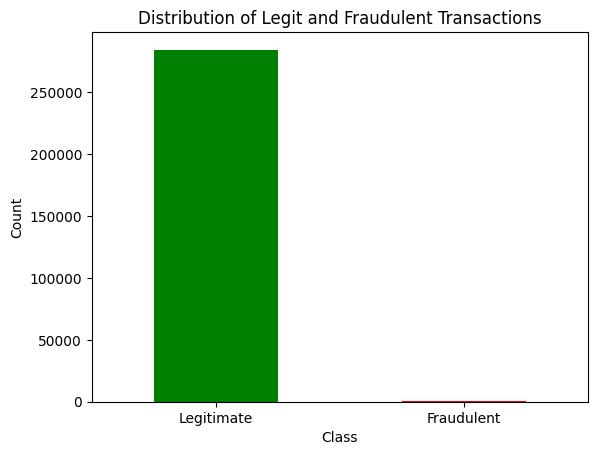

In [8]:

import matplotlib.pyplot as plt

# Assuming 'credit_card_data' is your Pandas DataFrame
class_counts = credit_card_data['Class'].value_counts()

# Plotting the bar graph
class_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Legit and Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Legitimate', 'Fraudulent'], rotation=0)
plt.show()



### Insights: The dataset is highly imbalanced with the majority of the class is not fraudulent. This means that we need to perform some special techniques to overcome this imbalance in the dataset.
Class
- 0 -> Not fraudulent:  284315
- 1 -> Fraudulent: 492
- -> The non-fraudulent cases make up 99.8% of the dataset


### Data balancing method:

Because of the prevalence of one class than the other, I will implement some data balancing techniques to overcome this imbalance of the dataset. Some techniques that I will use include Random Undersampling, NearMiss Undersampling and SMOTE Oversampling.


In [9]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [10]:
# Get some descriptions of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### **Original Metrics Without Data Balancing Method**

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming 'X' is your feature matrix, 'y' is your labels, and 'credit_card_data' is your DataFrame
X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Create and train a logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_result)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113732
           1       0.69      0.61      0.65       191

    accuracy                           1.00    113923
   macro avg       0.85      0.81      0.82    113923
weighted avg       1.00      1.00      1.00    113923



#### Random Undersampling

- Build a sample dataset that has the normal distribution of fraudulent and non-fraudulent
- Therefore, I will sample the number of fraudulent transactions to be equal to the number of non-fraudulent transanctions.

In [14]:
!pip install imbalanced-learn

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming credit_card_data is your DataFrame


# Separate features (X) from the target variable (y)
X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']


# Transform the dataset using RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)
X_random, y_random = undersample.fit_resample(X, y)

# Split the data into training and testing sets
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_random, y_random, test_size=0.2, random_state=42)

# Create and train a logistic regression model
logistic_model_random = LogisticRegression(random_state=42)
logistic_model_random.fit(X_train_random, y_train_random)

# Make predictions on the test set
y_pred_random = logistic_model_random.predict(X_test_random)

# Evaluate the model
classification_report_result_random = classification_report(y_test_random, y_pred_random)
print("Classification Report:\n", classification_report_result_random)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### NearMiss Undersampling

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming you have a DataFrame named credit_card_data
# Replace 'Class' with the actual target variable name in your dataset
# Make sure to load your dataset before using it in the code

# Separate features (X) from the target variable (y)
X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use NearMiss to address class imbalance
nr = NearMiss()
X_nearmiss, y_nearmiss = nr.fit_resample(X_train, y_train)

# Split the resampled data into training and testing sets
X_train_nearmiss, X_test_nearmiss, y_train_nearmiss, y_test_nearmiss = train_test_split(
    X_nearmiss, y_nearmiss, test_size=0.2, random_state=42
)

# # Create and train a logistic regression model
# logistic_model_nearmiss = LogisticRegression(random_state=42)
# logistic_model_nearmiss.fit(X_train_nearmiss, y_train_nearmiss)

# # Make predictions on the test set
# y_pred_nearmiss = logistic_model_nearmiss.predict(X_test_nearmiss)

# # Evaluate the model
# classification_report_result_nearmiss = classification_report(y_test_nearmiss, y_pred_nearmiss)
# print("Classification Report:\n", classification_report_result_nearmiss)


#### SMOTE Oversampling

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming credit_card_data is your DataFrame

# Separate features (X) from the target variable (y)
X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']

# Transform the dataset using SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

# Split the oversampled data into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# # Fit the logistic regression model on the oversampled training data
# model = LogisticRegression()
# model.fit(X_train_smote, y_train_smote)

# # Make predictions on the oversampled testing data
# y_pred_smote = model.predict(X_test_smote)

# # Evaluate the performance of the model
# print(classification_report(y_test_smote, y_pred_smote))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56750
           1       0.97      0.95      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



## Splitting the data into Features & Targets

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Model Training

I will use three models for testing:
- Neural Network
- Logistic Regression
- Random Forest

For each of the model, I will test three databalancing method and compare to the original data without any balancing.

- **Logistic Regression**

In [43]:


data_balancing_method = [["Original Data", X_train, y_train, X_test, y_test], ["Random Undersampling", X_train_random, y_train_random, X_test_random, y_test_random], ["nearmiss", X_train_nearmiss, y_train_nearmiss, X_test_nearmiss, y_test_nearmiss], ["smote", X_train_smote, y_train_smote, X_test_smote, y_test_smote]]
# Write a function to take in X_train and y_train from the three data balancing methods and orignial method for three models
# Print out the accuracy, f1-score and precision score and compare with each other to see which model perform the best

def model_training(model, name, X_train_func, y_train_func, X_test_func, y_test_func):
  # Fit the model to the training data
  model.fit(X_train_func, y_train_func)

  # Make predictions on the test set
  y_pred = model.predict(X_test_func)

  # Evaluate the model performance
  accuracy = accuracy_score(y_test_func, y_pred)
  conf_matrix = confusion_matrix(y_test_func, y_pred)
  class_report = classification_report(y_test_func, y_pred)

  print(name)
  print(accuracy)
  print(conf_matrix)
  print(class_report)

# Create a Logistic Regression model
logistic_model = LogisticRegression(max_iter= 500, random_state=42)

for data in data_balancing_method:
  model_training(logistic_model, *data)


Original Data
0.9988939995084443
[[56851    13]
 [   50    48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.49      0.60        98

    accuracy                           1.00     56962
   macro avg       0.89      0.74      0.80     56962
weighted avg       1.00      1.00      1.00     56962

Random Undersampling
0.9289340101522843
[[95  4]
 [10 88]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

nearmiss
0.9367088607594937
[[71  4]
 [ 6 77]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        75
           1       0.95      0.93      0.94        83

    accuracy

- __Random Forest__

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier model
n_estimators=100
max_depth=None
random_forest_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

for data in data_balancing_method:
  model_training(random_forest_model, *data)


Original Data
0.9995611109160493
[[56862     2]
 [   23    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Random Undersampling
0.9238578680203046
[[95  4]
 [11 87]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

nearmiss
0.9810126582278481
[[74  1]
 [ 2 81]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.99      0.98      0.98        83

    accuracy

- __Neural Network__

In [45]:
from sklearn.neural_network import MLPClassifier

hidden_layer_sizes=(100,)
max_iter=200
# Create a Neural Network model
neural_network_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=42)


# Loop through each data balancing method and train neural network model
for data in data_balancing_method:
    model_training(neural_network_model, *data)

Original Data
0.9955408869070609
[[56629   235]
 [   19    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.25      0.81      0.38        98

    accuracy                           1.00     56962
   macro avg       0.63      0.90      0.69     56962
weighted avg       1.00      1.00      1.00     56962

Random Undersampling
0.7309644670050761
[[97  2]
 [51 47]]
              precision    recall  f1-score   support

           0       0.66      0.98      0.79        99
           1       0.96      0.48      0.64        98

    accuracy                           0.73       197
   macro avg       0.81      0.73      0.71       197
weighted avg       0.81      0.73      0.71       197



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nearmiss
0.5253164556962026
[[ 0 75]
 [ 0 83]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.53      1.00      0.69        83

    accuracy                           0.53       158
   macro avg       0.26      0.50      0.34       158
weighted avg       0.28      0.53      0.36       158

smote
0.9788087156850677
[[56429   321]
 [ 2089 54887]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     56750
           1       0.99      0.96      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



## Model Evaluation Explanation for Classification Report

- **Precision:**
  Precision indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0. It is calculated as:
  $$ \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Positives (FP)}} $$

- **Recall:**
  Recall, also known as Sensitivity or True Positive Rate, represents the ability of the model to correctly identify all relevant instances (actual class 1). It is calculated as:
  $$ \text{Recall} = \frac{\text{True Positives (TP)}} {\text{True Positives (TP) + False Negatives (FN)}} $$

- **F1 Score:**
  F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is particularly useful when there is an uneven class distribution. F1 score is calculated as:
  $$ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}} $$

- **Accuracy:**
  Accuracy is a measure of overall model performance, indicating the proportion of correctly classified instances (both True Positives and True Negatives) out of the total instances. It is calculated as:
  $$ \text{Accuracy} = \frac{\text{True Positives (TP) + True Negatives (TN)}}{\text{Total Instances}} $$



## Model Evaluation



### **Logistic Regression**

#### **Results and Observations**

**Original Data:**
- The classification report for the original data indicates an imbalanced dataset, with the majority class (Class 0) having high precision and recall, while the minority class (Class 1) shows lower values. The model achieves a high overall accuracy of 99.89%, primarily driven by the correct classification of the majority class. However, the lower recall for Class 1 suggests that the model struggles to identify instances of the minority class, potentially leading to false negatives. To address this class imbalance, considering resampling techniques such as random undersampling or NearMiss could be beneficial.

**Random Undersampling:**

- **Pros:** It has shown improvement in precision, recall, and F1-score for both classes. It is a simple and effective method to address class imbalance. The F1 score improves by 55% from 0.6 of the original data to 0.93.
- **Cons:** It involves discarding data, potentially leading to information loss.

**NearMiss:**

- **Pros:** Offers further improvement in performance for both precision and recall. It selects samples from the majority class strategically, focusing on those close to the decision boundary. The F1 score improves by 57% after applying NearMiss undersampling method.

- **Cons:** Like random undersampling, it involves discarding data.

**SMOTE:**

- **Observation:** In my case, SMOTE did  show significant improvement compared to the original data with 22% increase in precision, 93% in recall, and 73% increase in F1-score.
- **Consideration:** SMOTE is often beneficial for more complex datasets, but its effectiveness can vary. You might explore adjusting SMOTE's hyperparameters or combining it with other techniques.


### **Random Forest**

#### **Model Performance Insights**

**Original Data:**
- The Random Forest model exhibited exceptional performance on the original imbalanced dataset, achieving an accuracy of 99.95%. While precision for both classes was high, the recall for the minority class (fraud) was relatively lower at 77%. This suggests potential room for improvement in detecting fraud instances.

**Random Undersampling:**
- **Pros:** Although random undersampling slightly decreased overall accuracy, it significantly improved precision, recall, and F1-score for the minority class. The model achieved a more balanced performance in fraud detection with a notable increase in precision and recall.
- **Cons:** Potential information loss due to discarding data.

**NearMiss:**
- **Pros:** NearMiss, a targeted undersampling method, further improved precision, recall, and F1-score for fraud detection. It strategically selects samples from the majority class, focusing on those near the decision boundary. The model achieved enhanced performance in identifying instances of fraud.
- **Cons:** Similar to random undersampling, it involves discarding data.

**SMOTE:**
- **Observation:** SMOTE did show significant improvement over the original data. It maintained high accuracy and address the improve for recall imbalance of the minority class.
- **Consideration:** The choice of data balancing method depends on specific considerations, and both Random Undersampling and NearMiss have proven effective in enhancing Random Forest performance. Experimenting with these methods and tuning hyperparameters can optimize fraud detection performance.



### **Neural Network**

#### **Model Performance Insights**

**Original Data:**
- The Neural Network model on the original imbalanced dataset achieved a high overall accuracy of 99.55%. While precision for Class 0 was perfect, the model struggled with the imbalanced nature of the data, resulting in low precision, recall, and F1-score for the minority class (fraud). The recall for fraud (Class 1) was relatively higher at 81%, indicating a better ability to identify instances of fraud, but there is room for improvement.

**Random Undersampling:**
- **Pros:** Random Undersampling significantly improved precision, recall, and F1-score for the minority class, addressing the imbalance. However, the overall accuracy decreased, suggesting a trade-off between precision and recall.

- **Cons:** The model may miss some instances of fraud due to lower recall.

**NearMiss:**
- **Pros:** NearMiss did not perform well on the neural network model, resulting in low precision, recall, and F1-score for both classes. The model struggled to effectively identify instances of fraud, potentially due to the data reduction aspect of NearMiss.

- **Cons:** NearMiss did not yield desirable improvements and discarded important data.

**SMOTE:**
- **Observation:** SMOTE did not bring significant improvement over the original data for the neural network. While maintaining high accuracy, it did not effectively address the precision and recall imbalance for the minority class.

- **Consideration:** The neural network may require further tuning of hyperparameters or exploring other advanced techniques to handle the imbalanced nature of the dataset effectively.

### **Data Balancing Recommendation**
Based on the insights, none of the data balancing methods (Random Undersampling, NearMiss, SMOTE) achieved optimal performance for the neural network on the imbalanced credit card fraud dataset. Further experimentation and hyperparameter tuning may be necessary to enhance the model's ability to detect fraud effectively.


## Final Evaluation

- Overall, by using different data balancing methods, the precision, recall and F1-score improved tremendously up 50% increase from the original dataset without using any data balancing method.


- **What models to choose?**
  - Using Random Forest, we can have a higher accuracy score. Random Forest can handle imbalanced datasets well, especially when used in conjunction with techniques like SMOTE for oversampling the minority class. It's less prone to overfitting compared to individual decision trees, and it generalizes well to unseen data.

- **What data balancing method of that model to choose?**
  - In Random Forest model, SMOTE proves to be the best method because of the significant improvement in precision, recall and F1-score compared to the others.  



In [53]:
# Confusion matrix values
tp = 56741  # True Positives
fp = 9   # False Positives
fn = 0   # False Negatives

# Average cost for one case of credit card fraud detection
cost_of_fp = 79  # Cost of a False Positive
cost_of_fn = 79  # Cost of a False Negative

# Calculate savings
savings = (tp * cost_of_fn) - (fp * cost_of_fp)

print("Number of fraud cases predicted:", tp + fp)
print("Estimated savings:", savings)


Number of fraud cases predicted: 56750
Estimated savings: 4481828
